# 코호트 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# 한글 깨짐 해결
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [3]:
df = pd.read_csv('./looker_(datetime).csv')

C:\Users\LG\AppData\Local\Temp\ipykernel_76\3448098404.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./looker_(datetime).csv')


## 0. 데이터 전처리

### sess_created_at >> day버전, month버전, year버전

In [4]:
import datetime as dt

# sess_created_at_dt 
df['sess_created_at_dt'] = pd.to_datetime(df['sess_created_at'], format='ISO8601')
df['sess_created_at_dt'] = df['sess_created_at_dt'].dt.strftime('%Y-%m-%d %H:%M:%S')
df['sess_created_at_dt'] = pd.to_datetime(df['sess_created_at_dt'], format='%Y-%m-%d %H:%M:%S')

# sess_created_at_day 
df['sess_created_at_day'] = df['sess_created_at_dt'].dt.strftime('%Y-%m-%d')
df['sess_created_at_day'] = pd.to_datetime(df['sess_created_at_day'], format='%Y-%m-%d')

# sess_created_at_year
df['sess_created_at_year'] = df['sess_created_at_day'].dt.year

# sess_created_at_month
df['sess_created_at_month'] = df['sess_created_at_day'].dt.strftime('%Y.%m')

In [5]:
pd.set_option('display.max_columns', None)
df.head(1)

,user_id,age,gender,account_state,account_city,account_country,latitude,longitude,account_traffic_source,account_created_at,order_id,order_items_id,status,sale_price,order_created_at,shipped_at,delivered_at,returned_at,event_id,session_id,sequence_number,login_user_id,sess_created_at,sess_traffic_source,uri,event_type,ip_address,sess_state,sess_city,inventory_item_id,product_id,category,brand,product_name,inventory_created_at,inventory_sold_at,cost,sess_created_at_dt,sess_created_at_day,sess_created_at_year,sess_created_at_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1642173.0,0f2ec251-45b7-423e-9b0c-bec0b51f8da9,1.0,NaN,2020-07-07 07:01:00+00:00,Facebook,/product/19439,product,30.255.30.75,Chungcheongnam-do,Asan City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-07 07:01:00,2020-07-07,2020.0,2020.07


#### session_id가 없는 유저들이 있음

In [6]:
df[df['session_id'].isna()]['user_id']

69         33217.0
89         40413.0
123         6339.0
319        75851.0
642        64458.0
            ...   
2466226        NaN
2466227        NaN
2466228        NaN
2466229        NaN
2466230        NaN
Name: user_id, Length: 364774, dtype: float64

In [7]:
df[df['user_id'] ==  75851]

,user_id,age,gender,account_state,account_city,account_country,latitude,longitude,account_traffic_source,account_created_at,order_id,order_items_id,status,sale_price,order_created_at,shipped_at,delivered_at,returned_at,event_id,session_id,sequence_number,login_user_id,sess_created_at,sess_traffic_source,uri,event_type,ip_address,sess_state,sess_city,inventory_item_id,product_id,category,brand,product_name,inventory_created_at,inventory_sold_at,cost,sess_created_at_dt,sess_created_at_day,sess_created_at_year,sess_created_at_month
319,75851.0,17.0,M,Bahia,Salvador,Brasil,-12.973389,-38.491975,Display,2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN


## df_

#### df_ : session_id가 있는 유저만 뽑은 데이터
#### 주차 계산을 위해 sess_created_at >> sess_created_at_week 주차 컬럼도 생성

In [6]:
# sess_created_at_week : 주차 컬럼 생성
df_ = df
df_['sess_created_at_day'] = pd.to_datetime(df_['sess_created_at_day'])
df_ = df_.dropna(subset=['sess_created_at_day'])
df_['sess_created_at_week'] = df_['sess_created_at_day'].apply(lambda x: x.isocalendar()[1])
df_.head(1)

C:\Users\LG\AppData\Local\Temp\ipykernel_10044\1324547745.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['sess_created_at_week'] = df_['sess_created_at_day'].apply(lambda x: x.isocalendar()[1])


,user_id,age,gender,account_state,account_city,account_country,latitude,longitude,account_traffic_source,account_created_at,order_id,order_items_id,status,sale_price,order_created_at,shipped_at,delivered_at,returned_at,event_id,session_id,sequence_number,login_user_id,sess_created_at,sess_traffic_source,uri,event_type,ip_address,sess_state,sess_city,inventory_item_id,product_id,category,brand,product_name,inventory_created_at,inventory_sold_at,cost,sess_created_at_dt,sess_created_at_day,sess_created_at_year,sess_created_at_month,sess_created_at_week
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1642173.0,0f2ec251-45b7-423e-9b0c-bec0b51f8da9,1.0,NaN,2020-07-07 07:01:00+00:00,Facebook,/product/19439,product,30.255.30.75,Chungcheongnam-do,Asan City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-07 07:01:00,2020-07-07,2020.0,2020.07,28


In [9]:
# 세션이 있는 유저 중에 가입일자가 첫 세션 접속일자보다 나중에 있는 유저는 없음
df_[df_['account_created_at'] > df_['sess_created_at']]

,user_id,age,gender,account_state,account_city,account_country,latitude,longitude,account_traffic_source,account_created_at,order_id,order_items_id,status,sale_price,order_created_at,shipped_at,delivered_at,returned_at,event_id,session_id,sequence_number,login_user_id,sess_created_at,sess_traffic_source,uri,event_type,ip_address,sess_state,sess_city,inventory_item_id,product_id,category,brand,product_name,inventory_created_at,inventory_sold_at,cost,sess_created_at_dt,sess_created_at_day,sess_created_at_year,sess_created_at_month,sess_created_at_week


## 1. 리텐션, 코호트 차트 함수

### 1-1) month

#### month 리텐션

In [26]:
# ipypb 라이브러리 임포트
from ipypb import track

def retention_month(df):
    #df = df[df['sess_created_at_year'] == year]

    # df 전처리(필요한 컬럼만 남겨놓기)
    df = df[['user_id', 'sess_created_at_month']]

    # 처음 세션에 진입한 시기
    first_sess_in = df.groupby('user_id')['sess_created_at_month'].min().reset_index()
    first_sess_in = first_sess_in.rename(columns={'sess_created_at_month': 'first_sess_in_month'})

    # df_xx에 first_sess_in 컬럼 만들기
    df = df.merge(first_sess_in, on='user_id', how='outer')

    # 주기별 세션 접속 user 계산
    co = df.groupby(['first_sess_in_month', 'sess_created_at_month']).user_id.nunique().reset_index()
    co = co.rename({'user_id': 'total_users', 'sess_created_at_month': 'sess_cycle_month'}, axis=1)

    # 코호트 기준 기간 계산
    temp = []
    for i in track(range(co.shape[0])):
        f_first_session = pd.to_datetime(co.first_sess_in_month[i]).to_period('M')
        f_sess_cycle = pd.to_datetime(co.sess_cycle_month[i]).to_period('M')

        month_diff = (f_sess_cycle - f_first_session).n

        temp.append(month_diff)
    co['cohort_period_month'] = temp

    ## 재접속 계산_unstack
    co_retention = co.set_index(['first_sess_in_month', 'cohort_period_month'])
    co_retention = co_retention.total_users.unstack(1)
    retention = co_retention.div(co_retention[0], axis=0)
    return retention

#### month 코호트

In [8]:
# 코호트 차트 시각화
def plot_cohort_chart_month(retention):

    # 그래프에 의미없는 값은 보여주지 않기 위해 안 나와도 되는 값의 위치 표시
    mask = retention.isnull()
    mask.iloc[:, 0] = True

    # cohort chart 시각화
    plt.figure(figsize = (12, 10))

    sns.heatmap(
        retention, 
        mask=mask, 
        annot=True, 
        annot_kws={'size':11},
        fmt='.0%', 
        cmap=sns.cubehelix_palette(8),
        linewidths=.1
    )
    
    plt.title('cohort chart', fontsize=20)
    plt.xlabel('month(개월)', fontsize=10)
    plt.ylabel('cohort', fontsize=10)
    
    plt.show()

### 1-2) week

#### week 리텐션
코호트 주 별로 보기 (1년 52주)
- dt.isoweek
- df[‘day’].dt.isocalendar().week (~52)
- strftime(%W) (~53)

In [9]:
def retention_week(df, year):
    df = df[df['sess_created_at_year'] == year]

    # df 전처리(필요한 컬럼만 남겨놓기)
    df = df[['user_id', 'sess_created_at_day', 'sess_created_at_week']]

    # 처음 세션에 진입한 시기
    first_sess_in = df.groupby('user_id')['sess_created_at_day'].min().reset_index()
    first_sess_in = first_sess_in.rename(columns={'sess_created_at_day': 'first_sess_in_day'})
    # 처음 세션 진입 날짜로부터 주차 계산
    first_sess_in['first_sess_week'] = first_sess_in['first_sess_in_day'].apply(lambda x: x.isocalendar()[1])

    # df_xx에 first_sess_in 컬럼 만들기
    df = df.merge(first_sess_in, on='user_id', how='outer')

    # 주기별 세션 접속 user 계산
    co = df.groupby(['first_sess_week', 'sess_created_at_week']).user_id.nunique().reset_index()
    co = co.rename({'user_id': 'total_users', 'sess_created_at_week': 'sess_cycle_week'}, axis=1)

    # 코호트 기준 기간 계산 (조건문을 줘서 해결)
    temp = []
    for i in track(range(co.shape[0])):
        first_session_week = co['first_sess_week'][i]  # 첫 번째 세션의 주차
        session_cycle_week = co['sess_cycle_week'][i]  # 현재 세션의 주차
        # 첫 세션 접속 주차가 1주차가 아니면서, 세션 다시 들어온 주차가 1인  'sess_cycle_week'는 53으로 바꿔주기
        co.loc[(co['first_sess_week'] != 1) & (co['sess_cycle_week'] == 1), 'sess_cycle_week'] = 53

        week_diff = session_cycle_week - first_session_week  # 주차 간격 계산

        temp.append(week_diff)
    co['cohort_period_week'] = temp

    ## 재접속 계산_unstack
    co_retention = co.set_index(['first_sess_week', 'cohort_period_week'])

    ## 재접속 계산_unstack
    co_retention = co_retention.total_users.unstack(1)
    retention = co_retention.div(co_retention[0], axis=0)
    return retention

### week 코호트

In [10]:
# 코호트 차트 시각화
def plot_cohort_chart_week(retention):

    # 그래프에 의미없는 값은 보여주지 않기 위해 안 나와도 되는 값의 위치 표시
    mask = retention.isnull()
    mask.iloc[:, 0] = True

    # cohort chart 시각화
    plt.figure(figsize = (12, 10))

    sns.heatmap(
        retention, 
        mask=mask, 
        annot=True, 
        annot_kws={'size':11},
        fmt='.0%', 
        cmap=sns.cubehelix_palette(8),
        linewidths=.1
    )
    
    plt.title('cohort chart', fontsize=20)
    plt.xlabel('week(주차)', fontsize=10)
    plt.ylabel('cohort', fontsize=10)
    
    plt.show()

### 1-3) 코호트 커브

In [11]:
# 코호트 커브 시각화
def plot_retention_curve(retention):
    # usage interval별로 retention 평균 계산
    retention_avg = retention.mean(axis = 0) * 100
    
    # retention curve 시각화
    plt.figure(figsize = (10, 8))
    
    plt.plot(range(0, len(retention_avg)), retention_avg)    
    plt.title('retention curve', fontsize=25)
    plt.ylabel('percentage', fontsize=15)
    
    plt.show()

## 3개월
(제대로 구현 안됨.. 이건 일단 패스)

In [34]:
def plot_cohort_chart_quarter(retention):
    # 그래프에 의미없는 값은 보여주지 않기 위해 안 나와도 되는 값의 위치 표시
    mask = retention.isnull()
    mask.iloc[:, 0] = True

    # cohort chart 시각화
    plt.figure(figsize=(12, 10))

    sns.heatmap(
        retention,
        mask=mask,
        annot=False,
        annot_kws={'size': 11},
        fmt='.0%',
        cmap=sns.cubehelix_palette(8),
        linewidths=.1
    )

    plt.title('cohort chart', fontsize=20)
    plt.xlabel('quarter(분기)', fontsize=10)  # x축 레이블 수정
    plt.ylabel('cohort', fontsize=10)

    plt.show()


In [30]:
retention = retention_month(df_)
retention

 [████████████████████████████████████████████████████████████] 1753/1753 [00:02<00:00, 0.00s/it]

cohort_period_month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
first_sess_in_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019.01,1.0,0.047619,0.047619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047619,0.047619,NaN,0.047619,NaN,0.095238,NaN,NaN,NaN,NaN,NaN,0.047619,NaN,NaN,NaN,NaN,NaN,NaN,0.047619,NaN,0.095238,NaN,0.095238,NaN,NaN,NaN,NaN,0.047619,0.142857,NaN,NaN,NaN,NaN,NaN,0.047619,NaN,NaN,NaN,NaN,NaN,0.047619,NaN,NaN
2019.02,1.0,NaN,NaN,NaN,0.058824,NaN,0.058824,NaN,0.058824,NaN,0.029412,0.029412,NaN,NaN,NaN,0.058824,NaN,0.029412,NaN,NaN,0.029412,NaN,NaN,NaN,0.088235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029412,NaN,0.058824,NaN,NaN,0.029412,0.029412,NaN,0.029412,NaN,NaN,NaN,NaN,NaN,0.029412,NaN,NaN,NaN,0.029412,NaN,NaN,NaN,0.029412,NaN,NaN,NaN,NaN
2019.03,1.0,0.037975,NaN,0.012658,0.025316,0.012658,0.037975,0.037975,0.025316,0.012658,0.063291,0.012658,NaN,NaN,0.037975,NaN,0.012658,NaN,0.012658,NaN,0.012658,NaN,0.012658,0.025316,NaN,0.050633,0.025316,0.037975,NaN,NaN,0.012658,NaN,0.025316,0.037975,0.037975,0.025316,0.050633,0.050633,0.012658,NaN,0.025316,0.037975,0.037975,0.012658,0.012658,NaN,0.012658,0.025316,0.025316,0.012658,NaN,NaN,0.012658,0.025316,0.037975,0.012658,NaN,NaN,0.012658
2019.04,1.0,0.032258,0.010753,0.021505,0.010753,0.021505,0.010753,NaN,0.021505,0.032258,0.010753,0.010753,NaN,0.021505,0.010753,0.021505,NaN,0.032258,NaN,0.010753,0.021505,0.010753,0.010753,0.010753,0.021505,0.032258,0.010753,0.021505,0.021505,NaN,NaN,NaN,NaN,0.021505,NaN,0.010753,0.021505,0.010753,0.010753,0.010753,0.021505,0.021505,0.021505,0.010753,0.043011,0.010753,NaN,NaN,0.010753,0.032258,0.010753,0.010753,NaN,NaN,0.021505,NaN,0.021505,0.021505,NaN
2019.05,1.0,0.012821,0.006410,0.006410,0.012821,0.025641,0.012821,0.025641,0.019231,0.006410,0.019231,0.012821,NaN,0.019231,0.006410,NaN,0.012821,0.012821,0.032051,NaN,0.038462,0.044872,NaN,0.012821,0.012821,0.038462,0.012821,0.012821,0.025641,NaN,NaN,0.025641,NaN,0.012821,0.012821,0.025641,0.006410,NaN,0.006410,0.012821,0.012821,0.025641,0.025641,0.012821,0.025641,0.019231,0.019231,0.019231,0.006410,NaN,0.012821,0.032051,0.012821,0.019231,0.032051,0.012821,0.006410,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023.09,1.0,0.090785,0.075427,0.074403,0.040273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023.10,1.0,0.113579,0.099302,0.054569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023.11,1.0,0.139093,0.080453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


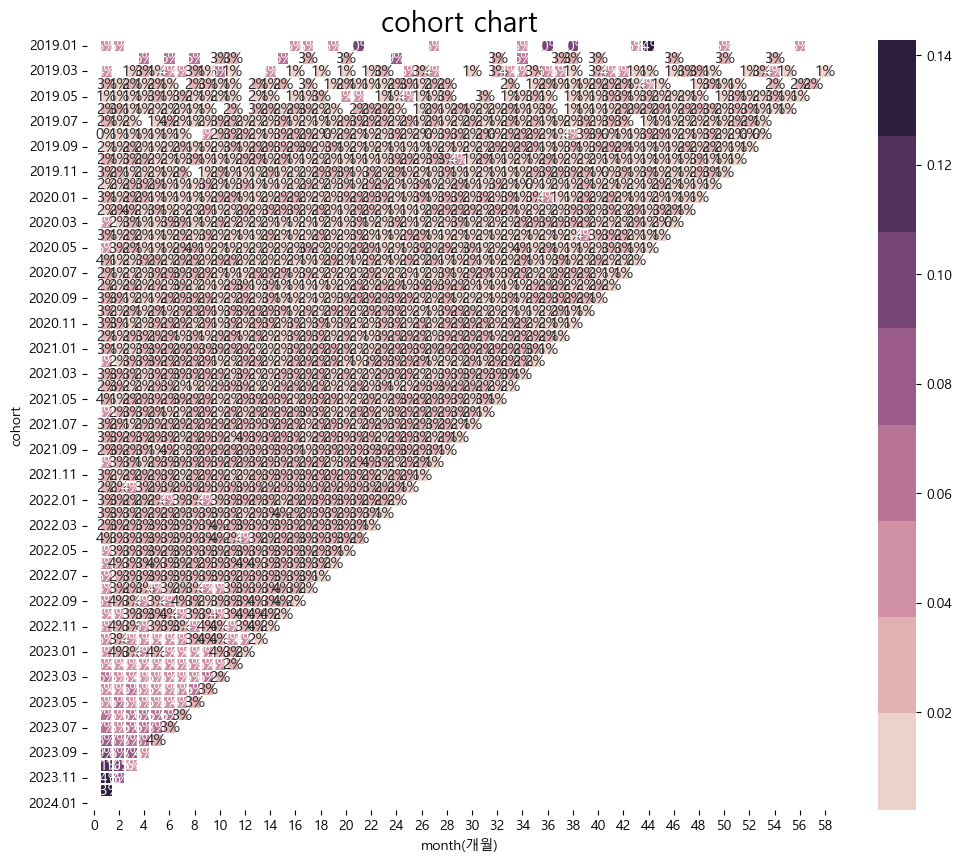

In [31]:
plot_cohort_chart_month(retention)

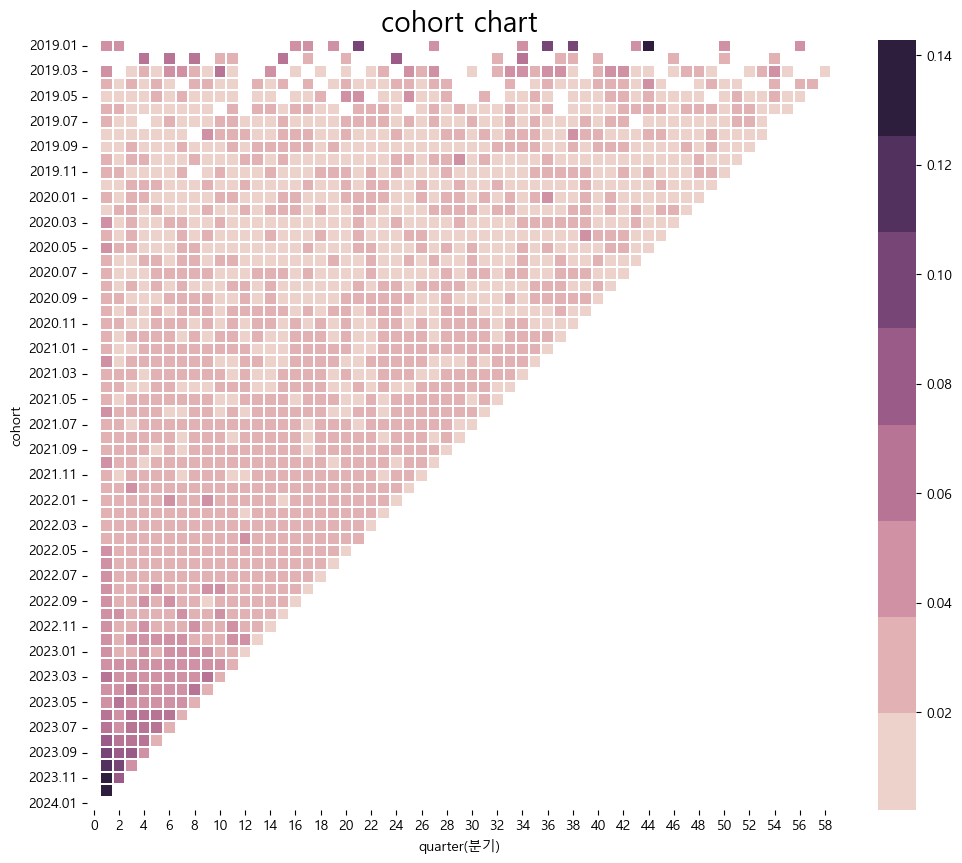

In [35]:
plot_cohort_chart_quarter(retention)

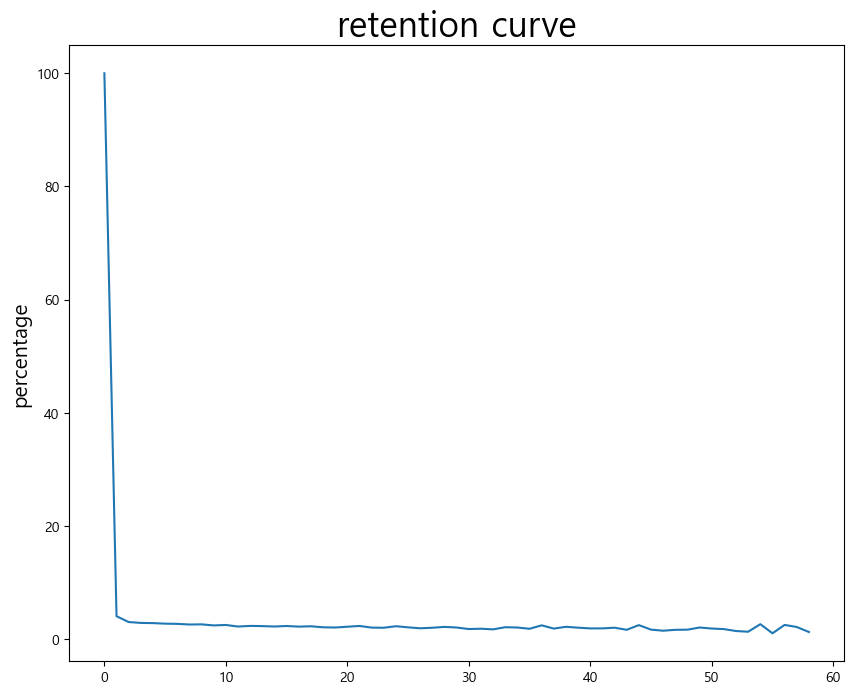

In [36]:
plot_retention_curve(retention)

x축은 usage interval을 나타내며, y축은 해당 usage interval에서의 평균 retention

In [39]:
# usage interval별로 retention 평균 계산
retention_avg = retention.mean(axis = 0) * 100
retention_curve_values = retention_avg.iloc[[0, 1, 2, 3, 4]]
print(retention_curve_values)

cohort_period_month
0    100.000000
1      4.059624
2      3.026044
3      2.873215
4      2.838337
dtype: float64


## 2. 리텐션 구하기(실습)

### 2019년도 데이터 사용

#### week

In [101]:
df_19 = df_[df_['sess_created_at_year'] == 2019]

# df 전처리(필요한 컬럼만 남겨놓기)
df_19 = df_19[['user_id', 'sess_created_at_day', 'sess_created_at_week']]

# 처음 세션에 진입한 시기
first_sess_in = df_19.groupby('user_id')['sess_created_at_day'].min().reset_index()
first_sess_in = first_sess_in.rename(columns={'sess_created_at_day': 'first_sess_in_day'})
# 처음 세션 진입 날짜로부터 주차 계산
first_sess_in['first_sess_week'] = first_sess_in['first_sess_in_day'].apply(lambda x: x.isocalendar()[1])

# df_xx에 first_sess_in 컬럼 만들기
df_19 = df_19.merge(first_sess_in, on='user_id', how='outer')
df_19

,user_id,sess_created_at_day,sess_created_at_week,first_sess_in_day,first_sess_week
0,115.0,2019-09-04,36,2019-09-04,36.0
1,158.0,2019-04-16,16,2019-04-16,16.0
2,178.0,2019-12-20,51,2019-12-20,51.0
3,273.0,2019-12-10,50,2019-12-10,50.0
4,277.0,2019-10-18,42,2019-10-18,42.0
...,...,...,...,...,...
241089,NaN,2019-06-24,26,NaT,NaN
241090,NaN,2019-03-28,13,NaT,NaN
241091,NaN,2019-04-10,15,NaT,NaN
241092,NaN,2019-09-16,38,NaT,NaN


In [106]:
# 52주차에 처음으로 접속했고, 그 다음 세션 생성일이 1주차
# 이것의 의미는 세션 접속 일자가 그 다음 년도로 넘어갔다는 말
df_19[(df_19['sess_created_at_week']==1) & (df_19['first_sess_week']==52)]

,user_id,sess_created_at_day,sess_created_at_week,first_sess_in_day,first_sess_week
81,3709.0,2019-12-30,1,2019-12-26,52.0
1734,60973.0,2019-12-30,1,2019-12-26,52.0
2061,71174.0,2019-12-31,1,2019-12-29,52.0
2131,73692.0,2019-12-30,1,2019-12-28,52.0
2212,76458.0,2019-12-31,1,2019-12-29,52.0


In [102]:
# 주기별 세션 접속 user 계산
co = df_19.groupby(['first_sess_week', 'sess_created_at_week']).user_id.nunique().reset_index()
co = co.rename({'user_id': 'total_users', 'sess_created_at_week': 'sess_cycle_week'}, axis=1)
co

,first_sess_week,sess_cycle_week,total_users
0,1.0,1,26
1,1.0,2,1
2,2.0,2,4
3,3.0,3,4
4,3.0,11,1
...,...,...,...
203,50.0,51,3
204,51.0,51,76
205,51.0,52,1
206,52.0,1,5


In [85]:
# 코호트 기준 기간 계산
# 이상한 값들이 존재
temp = []
for i in track(range(co.shape[0])):
    first_session_week = co['first_sess_week'][i]  # 첫 번째 세션의 주차
    session_cycle_week = co['sess_cycle_week'][i]  # 현재 세션의 주차

    week_diff = session_cycle_week - first_session_week  # 주차 간격 계산

    temp.append(week_diff)
co['cohort_period_week'] = temp
co_1 = co[(co['first_sess_week'] > 1) & (co['sess_cycle_week'] == 1)]
co_1

 [████████████████████████████████████████████████████████████] 208/208 [00:00<00:00, 0.00s/it]

,first_sess_week,sess_cycle_week,total_users,cohort_period_week
181,44.0,1,1,-43.0
206,52.0,1,5,-51.0


In [115]:
# 코호트 기준 기간 계산 (조건문을 줘서 해결)
temp = []
for i in track(range(co.shape[0])):
    first_session_week = co['first_sess_week'][i]  # 첫 번째 세션의 주차
    session_cycle_week = co['sess_cycle_week'][i]  # 현재 세션의 주차
    # 첫 세션 접속 주차가 1주차가 아니면서, 세션 다시 들어온 주차가 1인  'sess_cycle_week'는 53으로 바꿔주기
    co.loc[(co['first_sess_week'] != 1) & (co['sess_cycle_week'] == 1), 'sess_cycle_week'] = 53

    week_diff = session_cycle_week - first_session_week  # 주차 간격 계산

    temp.append(week_diff)
co['cohort_period_week'] = temp

## 재접속 계산_unstack
co_retention = co.set_index(['first_sess_week', 'cohort_period_week'])
co_retention

 [████████████████████████████████████████████████████████████] 208/208 [00:00<00:00, 0.00s/it]

sess_cycle_week  total_users
first_sess_week cohort_period_week                              
1.0             0.0                               1           26
                1.0                               2            1
2.0             0.0                               2            4
3.0             0.0                               3            4
                8.0                              11            1
...                                             ...          ...
50.0            1.0                              51            3
51.0            0.0                              51           76
                1.0                              52            1
52.0            1.0                              53            5
                0.0                              52          108

[208 rows x 2 columns]

In [ ]:
co_retention.index.nunique()

In [92]:
len(co_retention.index)

208

In [139]:
## 재접속 계산_unstack
co_retention = co_retention.total_users.unstack(1)
#retention = co_retention.div(co_retention[0], axis=0)
#retention
co_retention

cohort_period_week  first_sess_week
0.0                 1.0                26.0
                    2.0                 4.0
                    3.0                 4.0
                    4.0                 9.0
                    5.0                 6.0
                                       ... 
42.0                48.0                NaN
                    49.0                NaN
                    50.0                NaN
                    51.0                NaN
                    52.0                NaN
Length: 1976, dtype: float64

In [ ]:
plot_cohort_chart(co_retention)

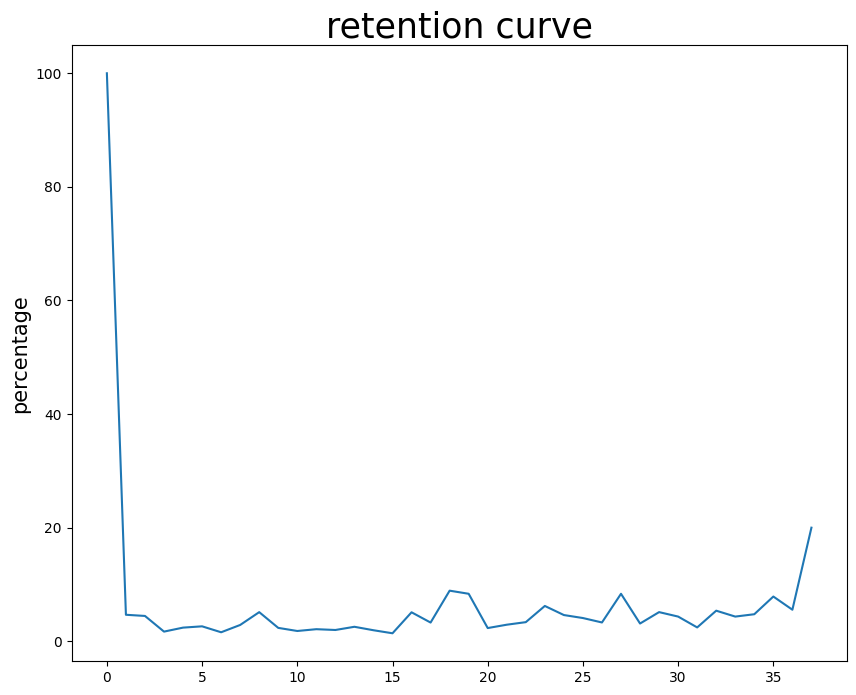

In [117]:
plot_retention_curve(retention)

## 3. 함수 작동 확인

In [143]:
tmp = retention_week(df_, 2023)
tmp = tmp.fillna(0)
tmp

 [████████████████████████████████████████████████████████████] 1409/1409 [00:05<00:00, 0.00s/it]

cohort_period_week,-48.0,-44.0,-43.0,-42.0,-39.0,-37.0,-36.0,-34.0,-33.0,-32.0,-31.0,-30.0,-28.0,-26.0,-25.0,-24.0,-23.0,-21.0,-20.0,-17.0,-16.0,-15.0,-14.0,-12.0,-10.0,-9.0,-5.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0
first_sess_week,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.039890,0.012380,0.009629,0.016506,0.006878,0.006878,0.008253,0.009629,0.009629,0.006878,0.005502,0.005502,0.008253,0.005502,0.006878,0.006878,0.012380,0.011004,0.009629,0.005502,0.011004,0.009629,0.011004,0.005502,0.009629,0.005502,0.004127,0.008253,0.006878,0.004127,0.008253,0.011004,0.008253,0.013755,0.009629,0.005502,0.009629,0.008253,0.004127,0.008253,0.009629,0.006878,0.005502,0.009629,0.006878,0.008253,0.006878,0.008253,0.008253,0.011004,0.006878
2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.048476,0.006925,0.009695,0.004155,0.011080,0.009695,0.001385,0.008310,0.011080,0.013850,0.009695,0.009695,0.015235,0.005540,0.008310,0.011080,0.011080,0.013850,0.005540,0.004155,0.011080,0.009695,0.012465,0.005540,0.011080,0.008310,0.015235,0.009695,0.008310,0.011080,0.004155,0.009695,0.011080,0.004155,0.006925,0.015235,0.006925,0.016620,0.006925,0.012465,0.009695,0.012465,0.009695,0.004155,0.006925,0.012465,0.005540,0.011080,0.005540,0.009695,0.000000
3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.053651,0.004471,0.008942,0.005961,0.011923,0.019374,0.011923,0.005961,0.011923,0.004471,0.010432,0.007452,0.002981,0.004471,0.008942,0.011923,0.014903,0.011923,0.016393,0.008942,0.007452,0.010432,0.008942,0.016393,0.007452,0.007452,0.010432,0.013413,0.004471,0.008942,0.008942,0.010432,0.007452,0.017884,0.013413,0.005961,0.004471,0.019374,0.010432,0.008942,0.007452,0.005961,0.008942,0.017884,0.013413,0.010432,0.005961,0.007452,0.001490,0.000000,0.000000
4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.050143,0.007163,0.014327,0.011461,0.010029,0.007163,0.014327,0.011461,0.007163,0.015759,0.005731,0.005731,0.017192,0.011461,0.004298,0.007163,0.007163,0.004298,0.012894,0.005731,0.004298,0.014327,0.014327,0.012894,0.002865,0.010029,0.015759,0.005731,0.015759,0.010029,0.008596,0.012894,0.008596,0.005731,0.008596,0.008596,0.004298,0.011461,0.008596,0.014327,0.010029,0.014327,0.012894,0.018625,0.014327,0.014327,0.000000,0.004298,0.000000,0.000000,0.000000
5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.039106,0.011173,0.011173,0.004190,0.015363,0.015363,0.012570,0.005587,0.001397,0.006983,0.005587,0.006983,0.012570,0.011173,0.005587,0.004190,0.011173,0.008380,0.004190,0.011173,0

In [144]:
tmp19= retention_week_1(df_,2019)
tmp19 = tmp19.fillna(0)
tmp19

 [████████████████████████████████████████████████████████████] 208/208 [00:01<00:00, 0.00s/it]

cohort_period_week,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,42.0
first_sess_week,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,26.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


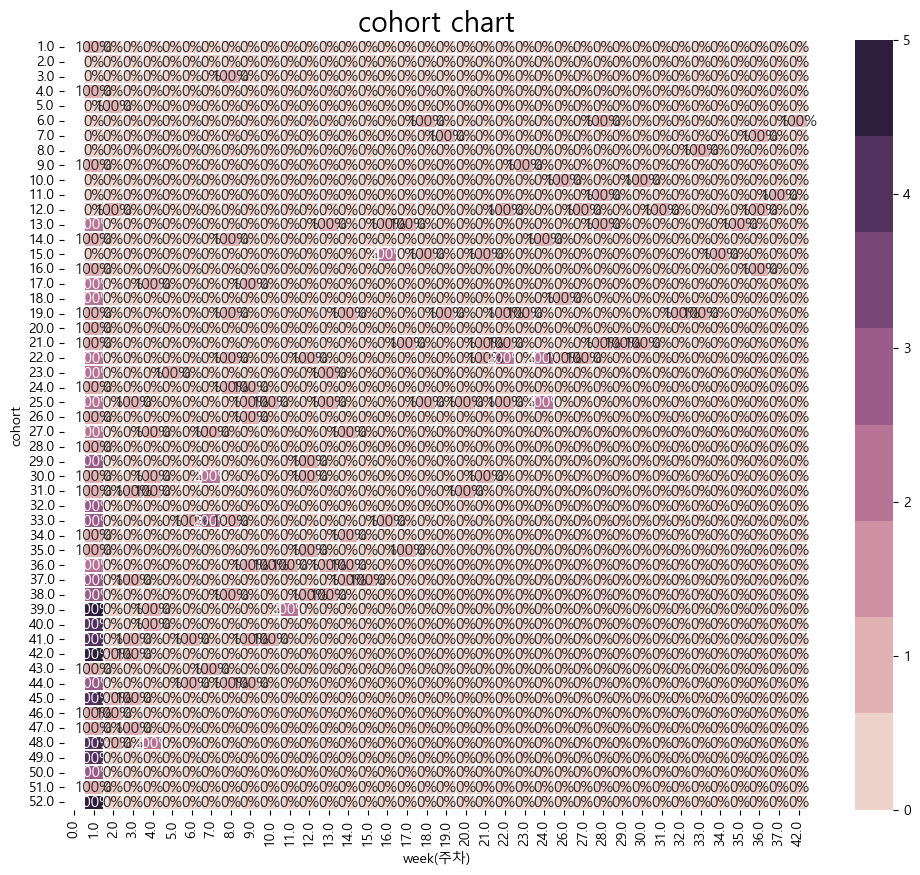

In [145]:
plot_cohort_chart_week(tmp19)

In [ ]:
def retention_week_1(df, year):
    df = df[df['sess_created_at_year'] == year]

    # df 전처리(필요한 컬럼만 남겨놓기)
    df = df[['user_id', 'sess_created_at_day', 'sess_created_at_week']]

    # 처음 세션에 진입한 시기
    first_sess_in = df.groupby('user_id')['sess_created_at_day'].min().reset_index()
    first_sess_in = first_sess_in.rename(columns={'sess_created_at_day': 'first_sess_in_day'})
    # 처음 세션 진입 날짜로부터 주차 계산
    first_sess_in['first_sess_week'] = first_sess_in['first_sess_in_day'].apply(lambda x: x.isocalendar()[1])

    # df_xx에 first_sess_in 컬럼 만들기
    df = df.merge(first_sess_in, on='user_id', how='outer')

    # 주기별 세션 접속 user 계산
    co = df.groupby(['first_sess_week', 'sess_created_at_week']).user_id.nunique().reset_index()
    co = co.rename({'user_id': 'total_users', 'sess_created_at_week': 'sess_cycle_week'}, axis=1)

    # 코호트 기준 기간 계산 (조건문을 줘서 해결)
    temp = []
    for i in track(range(co.shape[0])):
        first_session_week = co['first_sess_week'][i]  # 첫 번째 세션의 주차
        session_cycle_week = co['sess_cycle_week'][i]  # 현재 세션의 주차
        # 첫 세션 접속 주차가 1주차가 아니면서, 세션 다시 들어온 주차가 1인  'sess_cycle_week'는 53으로 바꿔주기
        co.loc[(co['first_sess_week'] != 1) & (co['sess_cycle_week'] == 1), 'sess_cycle_week'] = 53

        week_diff = session_cycle_week - first_session_week  # 주차 간격 계산

        temp.append(week_diff)
    co['cohort_period_week'] = temp

    ## 재접속 계산_unstack
    co_retention = co.set_index(['first_sess_week', 'cohort_period_week'])

    ## 재접속 계산_unstack
    co_retention = co_retention.total_users.unstack(1)
    #retention = co_retention.div(co_retention[0], axis=0)
    return co_retention

In [148]:
# 코호트 차트 시각화
def plot_cohort_chart_week_1(retention):

    # 그래프에 의미없는 값은 보여주지 않기 위해 안 나와도 되는 값의 위치 표시
    mask = retention.isnull()
    mask.iloc[:, 0] = True

    # cohort chart 시각화
    plt.figure(figsize = (12, 10))

    sns.heatmap(
        retention, 
        mask=mask, 
        annot=True, 
        annot_kws={'size':9},
        fmt='.0%', 
        cmap=sns.cubehelix_palette(8),
        linewidths=.1
    )
    
    plt.title('cohort chart', fontsize=20)
    plt.xlabel('week(주차)', fontsize=10)
    plt.ylabel('cohort', fontsize=10)
    
    plt.show()

In [150]:
tmp119 = retention_week_1(df_,2019)
tmp119

 [████████████████████████████████████████████████████████████] 208/208 [00:00<00:00, 0.00s/it]

cohort_period_week,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,42.0
first_sess_week,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,26.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
8.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
9.0,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


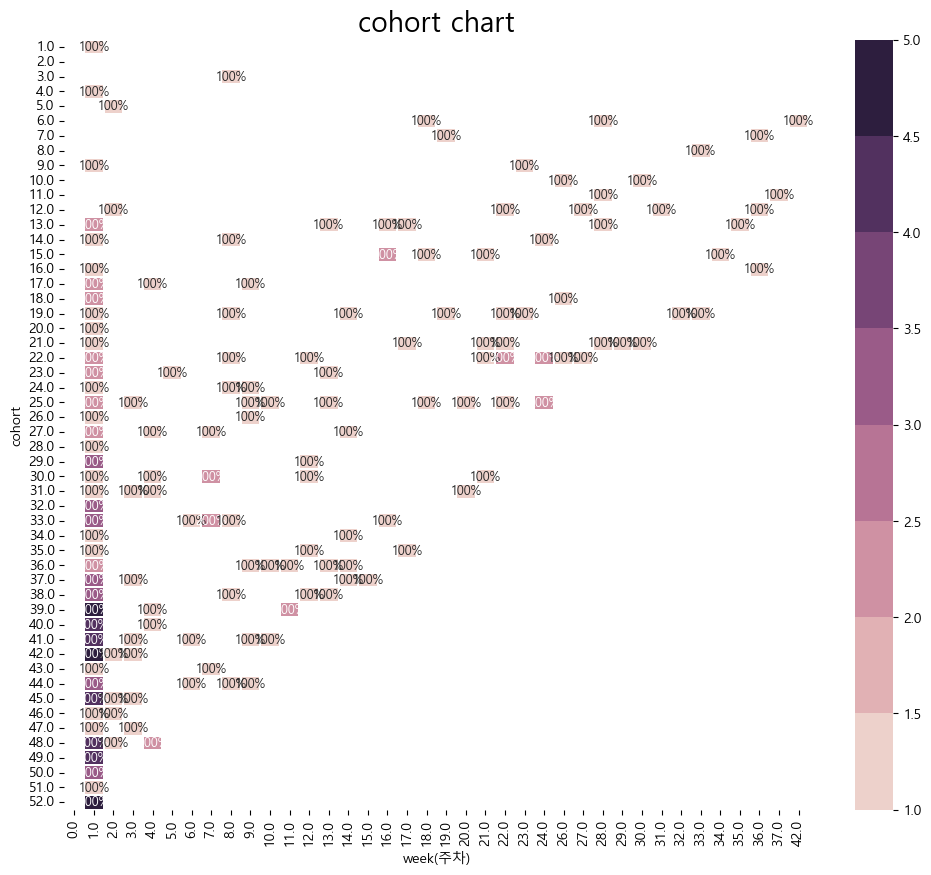

In [151]:
plot_cohort_chart_week_1(tmp119)